In [ ]:
#data process
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import pandas as pd
import math
from bs4 import BeautifulSoup
import os
import json


In [ ]:
test_dataset=pd.read_csv('full_test_data(Revised).csv')

train_dataset=pd.read_csv('full_train_data(Revised).csv')

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             5029 non-null   object
 1   date              5029 non-null   object
 2   content_original  5029 non-null   object
 3   bias              5029 non-null   int64 
 4   bias_text         5029 non-null   object
 5   source            5029 non-null   object
dtypes: int64(1), object(5)
memory usage: 235.9+ KB


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20114 entries, 0 to 20113
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             20113 non-null  object
 1   date              20114 non-null  object
 2   content_original  20114 non-null  object
 3   bias              20114 non-null  int64 
 4   bias_text         20114 non-null  object
 5   source            20114 non-null  object
dtypes: int64(1), object(5)
memory usage: 943.0+ KB


In [ ]:
train_dataset.columns

Index(['title', 'date', 'content_original', 'bias', 'bias_text', 'source'], dtype='object')

In [ ]:
from collections import Counter

# train_dataset['source'] is a list of publisher names
publisher_counts = Counter(train_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_publishers = sorted_publishers

# Print or analyze the top 30 publishers and their total published counts
for publisher, count in top_30_publishers:
    print(f"Publisher: {publisher}, Total Published: {count}")


Publisher: Washington Times, Total Published: 2238
Publisher: CNN (Web News), Total Published: 1923
Publisher: Politico, Total Published: 1887
Publisher: NPR Online News, Total Published: 1583
Publisher: Vox, Total Published: 1151
Publisher: New York Times - News, Total Published: 1042
Publisher: Townhall, Total Published: 1040
Publisher: Christian Science Monitor, Total Published: 969
Publisher: National Review, Total Published: 822
Publisher: Reuters, Total Published: 664
Publisher: Fox Online News, Total Published: 498
Publisher: The Guardian, Total Published: 495
Publisher: Reason, Total Published: 444
Publisher: Newsmax, Total Published: 399
Publisher: Fox News, Total Published: 390
Publisher: USA TODAY, Total Published: 378
Publisher: Salon, Total Published: 369
Publisher: Breitbart News, Total Published: 345
Publisher: Guest Writer - Right, Total Published: 296
Publisher: Associated Press, Total Published: 258
Publisher: Daily Beast, Total Published: 187
Publisher: TheBlaze.com,

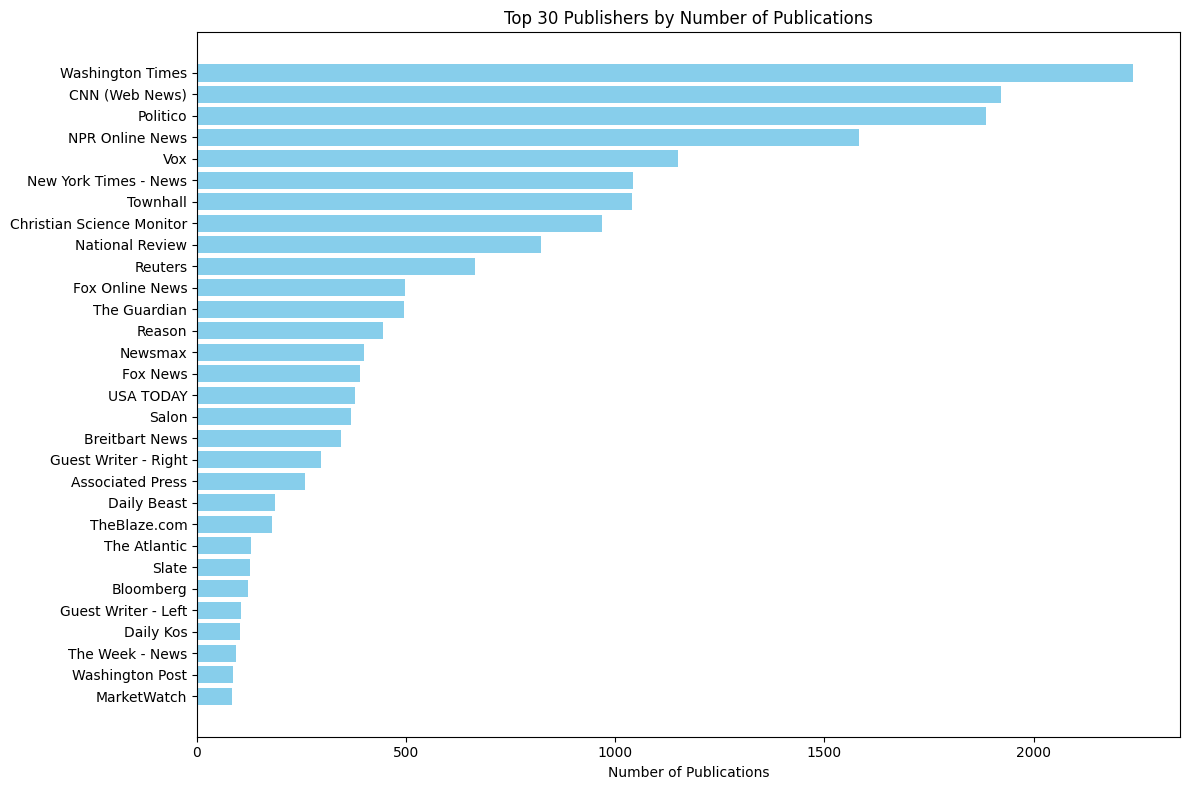

In [ ]:
# train_dataset['source'] is a list of publisher names
publisher_counts = Counter(train_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# top 30 publishers
top_30_publishers = sorted_publishers[:30]

# Extract data for plotting
publishers = [publisher for publisher, count in top_30_publishers]
counts = [count for publisher, count in top_30_publishers]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(publishers, counts, color='skyblue')
plt.xlabel('Number of Publications')
plt.title('Top 30 Publishers by Number of Publications')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.tight_layout()
plt.show()

In [ ]:

#  train_dataset['source'] is a list of publisher names
publisher_counts = Counter(train_dataset['source'])

# Calculate total number of publications
total_publications = sum(publisher_counts.values())

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_publishers = sorted_publishers[:30]

# Calculate sum of publications for top 30 publishers
sum_top_30_publications = sum(count for publisher, count in top_30_publishers)

# Calculate percentage
percentage_top_30 = (sum_top_30_publications / total_publications) * 100

print(f"The top 30 publishers account for {percentage_top_30:.2f}% of the total publications.")


The top 30 publishers account for 91.51% of the total publications.


In [ ]:
# test_dataset['source'] is a list of publisher names
test_publisher_counts = Counter(test_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_test_publishers = sorted(test_publisher_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 30 publishers
top_30_test_publishers = sorted_test_publishers

# Print or analyze the top 30 publishers and their total published counts
for publisher, count in top_30_test_publishers:
    print(f"Publisher: {publisher}, Total Published: {count}")

Publisher: Washington Times, Total Published: 560
Publisher: CNN (Web News), Total Published: 511
Publisher: Politico, Total Published: 471
Publisher: NPR Online News, Total Published: 382
Publisher: Vox, Total Published: 300
Publisher: New York Times - News, Total Published: 268
Publisher: Christian Science Monitor, Total Published: 246
Publisher: Townhall, Total Published: 245
Publisher: National Review, Total Published: 189
Publisher: Reuters, Total Published: 158
Publisher: Fox Online News, Total Published: 127
Publisher: Reason, Total Published: 122
Publisher: The Guardian, Total Published: 115
Publisher: Salon, Total Published: 102
Publisher: Fox News, Total Published: 91
Publisher: Newsmax, Total Published: 88
Publisher: USA TODAY, Total Published: 87
Publisher: Breitbart News, Total Published: 86
Publisher: Guest Writer - Right, Total Published: 77
Publisher: Associated Press, Total Published: 60
Publisher: Daily Beast, Total Published: 50
Publisher: Bloomberg, Total Published:

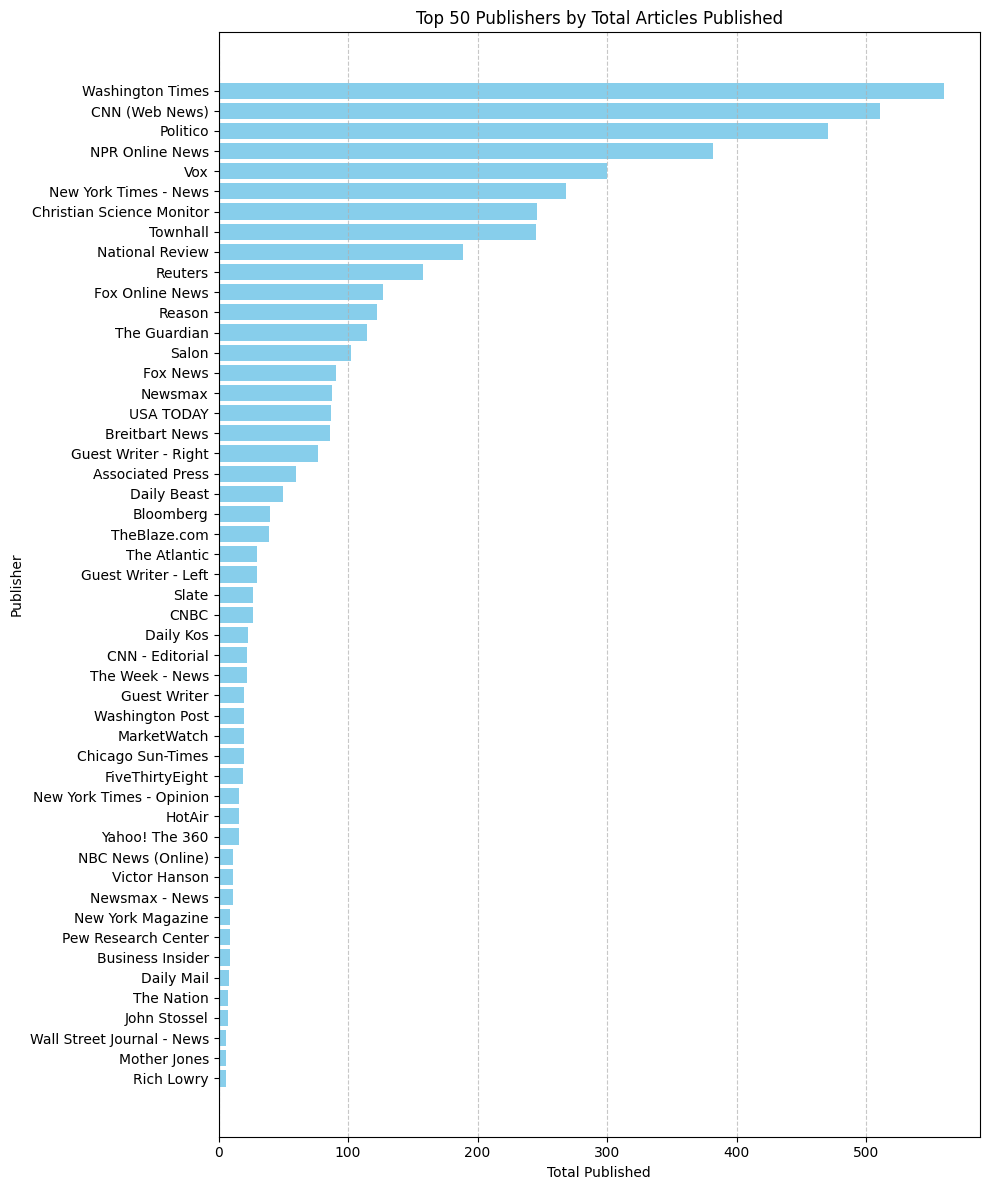

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar chart
publishers = [
    "Washington Times", "CNN (Web News)", "Politico", "NPR Online News", "Vox",
    "New York Times - News", "Christian Science Monitor", "Townhall", "National Review", "Reuters",
    "Fox Online News", "Reason", "The Guardian", "Salon", "Fox News", "Newsmax", "USA TODAY",
    "Breitbart News", "Guest Writer - Right", "Associated Press", "Daily Beast", "Bloomberg",
    "TheBlaze.com", "The Atlantic", "Guest Writer - Left", "Slate", "CNBC", "Daily Kos",
    "CNN - Editorial", "The Week - News", "Guest Writer", "Washington Post", "MarketWatch",
    "Chicago Sun-Times", "FiveThirtyEight", "New York Times - Opinion", "HotAir", "Yahoo! The 360",
    "NBC News (Online)", "Victor Hanson", "Newsmax - News", "New York Magazine", "Pew Research Center",
    "Business Insider", "Daily Mail", "The Nation", "John Stossel", "Wall Street Journal - News",
    "Mother Jones", "Rich Lowry", "Yahoo! News", "The Verge", "Quillette", "ProPublica",
    "New York Post", "Independent Journal Review", "New York Times (Online News)",
    "Washington Free Beacon", "Brookings Institution", "Roll Call", "New Republic", "Newsmax (News)",
    "BET", "NewsBusters", "The Week - Opinion", "BBC News", "PBS NewsHour", "Boston Herald",
    "Charles Krauthammer", "The Post Millennial", "Ben Shapiro", "Fox News Opinion", "CBS News",
    "Michael Brendan Dougherty", "InfoWars", "John Fund", "Juan Williams", "San Francisco Chronicle",
    "Mitú", "Allysia Finley (Wall Street Journal)", "George Will", "Chicago Tribune", "Brent Bozell",
    "IVN", "Jonah Goldberg", "Ezra Klein", "The Reporters Committee for Freedom of the Press",
    "Daily Chela", "Grist", "Foreign Policy", "Deseret News", "Tom Cole", "Sally Pipes",
    "Orange County Register", "Project Syndicate", "Medium", "Michelle Malkin", "Chris Ruddy",
    "Ralph Benko", "AP Fact Check", "Newsmax - Opinion", "Al Jazeera", "Foreign Affairs",
    "Pacific Standard", "Neil J. Young", "RollingStone.com", "MichelleMalkin.com", "Erraticus",
    "Boston Herald Editorial", "Brown Girl Magazine", "CNS News", "Arkadi Gerney", "Mashable",
    "The Texas Tribune", "The Dallas Morning News", "Red State", "International Business Times",
    "Atlanta Journal-Constitution", "The Western Journal", "AL.com", "CalMatters", "Elizabeth Warren",
    "Jeff Spross", "The Imaginative Conservative", "American Enterprise Institute", "Concord Monitor",
    "Black Enterprise", "Walt Handelsman (cartoonist)", "The Marshall Project", "Raw Story",
    "Damon Linker", "The Daily Caller", "NBC Today Show", "S.E. Cupp", "CBN",
    "Pacific Research Institute", "Defense One", "Portland Press Herald", "Misinformation Review",
    "Austin American-Statesman", "Penn Live", "Religion News Service", "Conor Friedersdorf",
    "City Journal", "NBCNews.com"
]

totals_published = [
    560, 511, 471, 382, 300, 268, 246, 245, 189, 158, 127, 122, 115, 102, 91, 88, 87, 86, 77, 60,
    50, 40, 39, 30, 30, 27, 27, 23, 22, 22, 20, 20, 20, 20, 19, 16, 16, 16, 11, 11, 11, 9, 9, 9, 8,
    7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]

# Correct the data by ensuring both lists have the same length
# I'll remove extra entries from the `publishers` list
publishers_corrected = publishers[:len(totals_published)]

# Selecting the top 50 publishers and their corresponding counts
top_50_publishers = publishers_corrected[:50]
top_50_totals = totals_published[:50]

# Plotting the bar chart for the top 50 publishers
plt.figure(figsize=(10, 12))
plt.barh(top_50_publishers, top_50_totals, color='skyblue')
plt.xlabel('Total Published')
plt.ylabel('Publisher')
plt.title('Top 50 Publishers by Total Articles Published')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


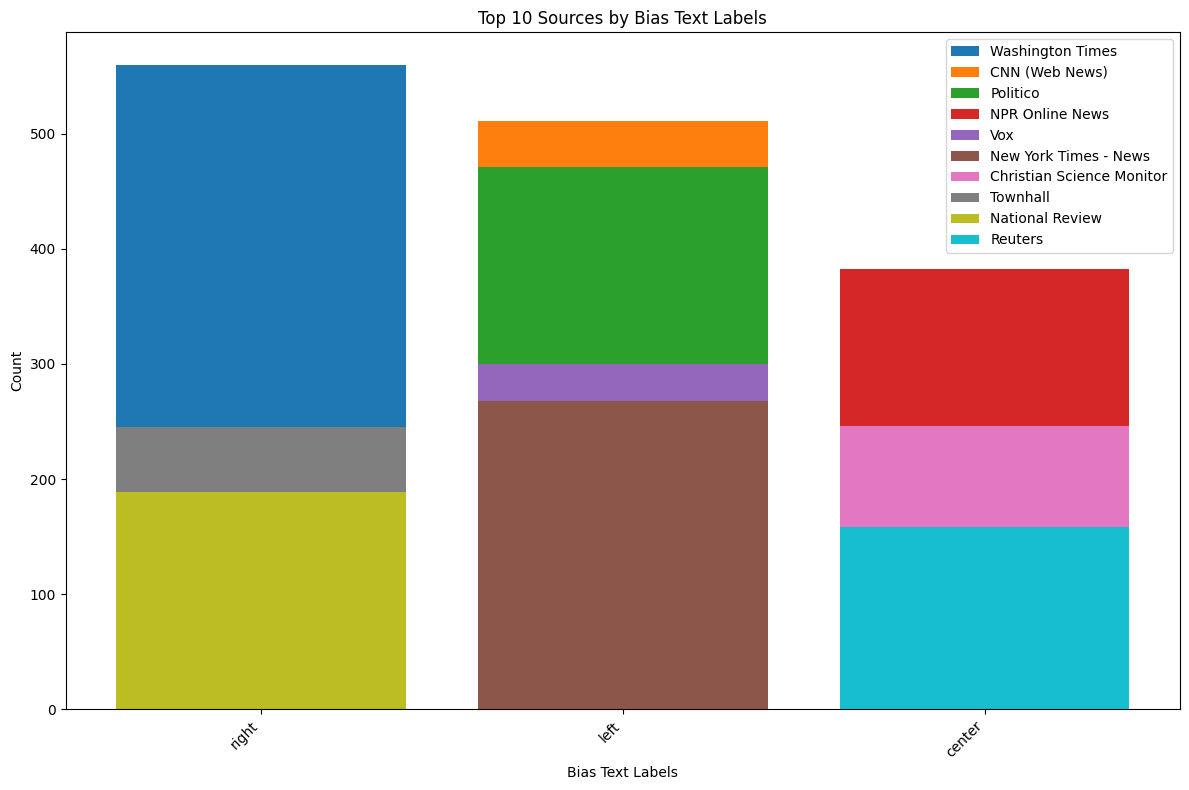

In [ ]:

# test_dataset['source'] and test_dataset['bias_text'] are lists or arrays
sources = test_dataset['source']
bias_texts = test_dataset['bias_text']

# Count occurrences of each source
source_counts = Counter(sources)

# Sort sources by count in descending order and get the top 10 sources
top_10_sources = [source for source, count in source_counts.most_common(10)]

# Initialize a Counter for bias text labels
bias_label_counts = {source: Counter() for source in top_10_sources}

# Aggregate bias text labels for top 10 sources
for source, bias_text in zip(sources, bias_texts):
    if source in top_10_sources:
        bias_label_counts[source][bias_text] += 1

# Plotting the data
plt.figure(figsize=(12, 8))

for source in top_10_sources:
    labels, counts = zip(*bias_label_counts[source].items())
    plt.bar(labels, counts, label=source)

plt.xlabel('Bias Text Labels')
plt.ylabel('Count')
plt.title('Top 10 Sources by Bias Text Labels')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# test_dataset['source'] and test_dataset['bias_text'] are lists or arrays
sources = test_dataset['source']
bias_texts = test_dataset['bias_text']

# Filter data where source is 'washington times'
washington_times_indices = [i for i, source in enumerate(sources) if source == 'washington times']
washington_times_bias_texts = [bias_texts[i] for i in washington_times_indices]

# Count occurrences of each bias text label for 'washington times'
bias_text_counts = Counter(washington_times_bias_texts)


In [ ]:
washington=test_dataset[test_dataset['source']==' Washington Times']

In [ ]:
washington = test_dataset[test_dataset['source'].str.strip() == 'Washington Times']


In [ ]:
washington['bias_text'].unique()

array(['right'], dtype=object)

In [ ]:
center=test_dataset[test_dataset['bias_text']=='center']

In [ ]:
center['source'].unique()

array(['Associated Press', 'NPR Online News', 'Guest Writer', 'USA TODAY',
       'Bloomberg', 'Wall Street Journal - News', 'Reuters',
       'Christian Science Monitor', 'Brookings Institution', 'CNBC',
       'The Week - News', 'Roll Call', 'FiveThirtyEight',
       'Yahoo! The 360', 'Pew Research Center', 'Project Syndicate',
       'Business Insider', 'ProPublica', 'Medium', 'Foreign Affairs',
       'Chicago Tribune', 'IVN', 'Erraticus', 'BBC News',
       'The Dallas Morning News', 'International Business Times',
       'AL.com', 'CalMatters',
       'The Reporters Committee for Freedom of the Press',
       'Concord Monitor', 'PBS NewsHour', 'The Marshall Project',
       'Foreign Policy', 'Defense One', 'Portland Press Herald',
       'Misinformation Review', 'Penn Live', 'Religion News Service',
       'Conor Friedersdorf'], dtype=object)

#Balancing the Source

In [ ]:
full_dataset =pd.read_csv('full_dataset(Revised).csv')

In [ ]:
import pandas as pd
from collections import Counter
import random

# train_dataset is a pandas DataFrame and 'source' is the column with publisher names
publisher_counts = Counter(full_dataset['source'])

# List of publishers to modify
publishers_to_modify = [
    "Washington Times", "CNN (Web News)", "Politico", "NPR Online News",
    "Vox", "New York Times - News", "Townhall", "Christian Science Monitor",
    "National Review", "Reuters","Fox Online News", "The Guardian", "Reason", "Christian Science Monitor, Total Published",
    "Newsmax", "Fox News", "Salon", "USA TODAY", "Breitbart News"
]

# Number of rows to keep for modified publishers
num_rows_for_modified = 400

# Minimum number of papers for other publishers
min_papers = 10

# List to store the filtered data
filtered_data = []

# Process publishers
for publisher, count in publisher_counts.items():
    publisher_data = full_dataset[full_dataset['source'] == publisher]

    if publisher in publishers_to_modify:
        # For specified publishers, shuffle and keep 500 rows
        publisher_data = publisher_data.sample(frac=1, random_state=random.randint(0, 10000))
        filtered_data.append(publisher_data.head(num_rows_for_modified))
    elif count >= min_papers:
        # For other publishers with 10+ papers, keep all rows
        filtered_data.append(publisher_data)

# Combine the filtered data back into a single DataFrame
balanced_full_dataset = pd.concat(filtered_data, ignore_index=True)

# Now 'filtered_train_dataset' contains the modified data

In [ ]:
a = Counter(balanced_full_dataset['source'])

# Sort publishers by total published counts in descending order
sorted_publishers = sorted(a.items(), key=lambda x: x[1], reverse=True)

# Get publishers
all_publishers = sorted_publishers

# Print or analyze the top 30 publishers and their total published counts
for publisher, count in all_publishers:
    print(f"Publisher: {publisher}, Total Published: {count}")

Publisher: Washington Times, Total Published: 400
Publisher: Salon, Total Published: 400
Publisher: CNN (Web News), Total Published: 400
Publisher: Fox Online News, Total Published: 400
Publisher: Townhall, Total Published: 400
Publisher: Politico, Total Published: 400
Publisher: New York Times - News, Total Published: 400
Publisher: NPR Online News, Total Published: 400
Publisher: Reason, Total Published: 400
Publisher: USA TODAY, Total Published: 400
Publisher: National Review, Total Published: 400
Publisher: Vox, Total Published: 400
Publisher: The Guardian, Total Published: 400
Publisher: Breitbart News, Total Published: 400
Publisher: Newsmax, Total Published: 400
Publisher: Reuters, Total Published: 400
Publisher: Christian Science Monitor, Total Published: 400
Publisher: Fox News, Total Published: 400
Publisher: Guest Writer - Right, Total Published: 373
Publisher: Associated Press, Total Published: 318
Publisher: Daily Beast, Total Published: 237
Publisher: TheBlaze.com, Total 

In [ ]:
balanced_full_dataset.shape

(11058, 6)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
train_df, test_df = train_test_split(balanced_full_dataset, test_size=0.3, random_state=42)

# Display the size of the training and test sets
print("\nSize of training set:", train_df.shape)
print("Size of test set:", test_df.shape)

# Save the splits to CSV files for later use
train_df.to_csv('/content/drive/My Drive/Datasci_266_Final_Project/balanced_train_data(Revised).csv', index=False)
test_df.to_csv('/content/drive/My Drive/Datasci_266_Final_Project/balanced_test_data(Revised).csv', index=False)


Size of training set: (7740, 6)
Size of test set: (3318, 6)
